#Задание: создать простой фильтр изображения

В вашем арсенале есть следующие операции:


*   изменение размера изображения
*   перевод в различные цветовые пространства
*   арифметические операции
*   комбинации этих операций
*   и другие, если вы понимаете их смысл

Ниже представлен пример такого фильтра.



## Загрузка изображения

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

d:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
image_height = 400
image_width = 600
dpi = 100

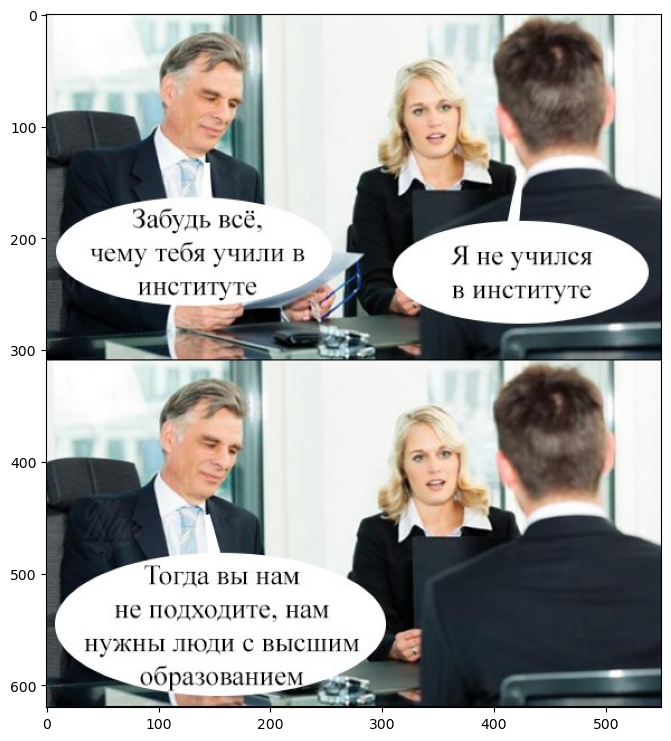

In [7]:
url = 'mem.jpeg'#f"https://placekitten.com/{image_width}/{image_height}"
img = io.imread(url)

plt.figure(figsize=(9, 9))
plt.imshow(img)

## Pencill Sketch фильтр

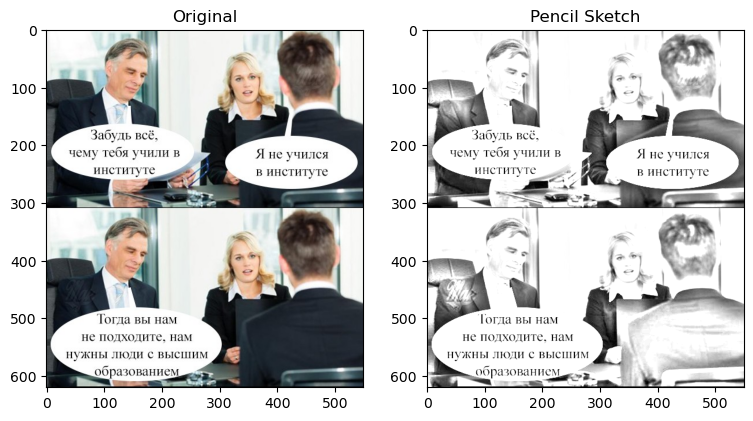

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# инвертируем изображение
inv_img = cv2.bitwise_not(gray)

# применяем гауссовский фильтр с ядром 111 на 111, стандратное отклонение 0
blurred_inv_img = cv2.GaussianBlur(inv_img, (111, 111), 0)

# Step 4: Blend using color dodge
sketch_img = cv2.divide(gray, 255-blurred_inv_img, scale=256.0)
plt.figure(figsize=(9, 9))
#plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(sketch_img, cmap='gray'), plt.title('Pencil Sketch')
plt.show()

# Примеры возможных фильтров



[Заходим из под VPN](https://www.analyticsvidhya.com/blog/2021/07/an-interesting-opencv-application-creating-filters-like-instagram-and-picsart/)



# Создание фильтра

In [2]:
import torch
from torch import nn
from torch.nn import functional as F

In [139]:
kernels = [
# просто прикольный фильтр, который выделяет вертикальные и горизонтальные линии
 torch.tensor([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]]),
#делает картинку зернистой/четкой
 torch.tensor([[0, -1, 0],
              [-1, 5, -1],
              [0, -1, 0]]),
# делает картинку мыльной
 torch.tensor([[0.0625, 0.125, 0.0625],
              [0.125, 0.25, 0.125],
              [0.0625, 0.125, 0.0625]])]

labels = ['Horizontal and vertical lines', 'Зернистось', 'Мыло']

In [140]:
def show_memes(img, kernels, labels=None):
    n_plot_rows = len(kernels)
    plt.figure(figsize=(20, 20))
    for i, kernel in enumerate(kernels):
        
        img_t = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0).float()

    
        conv_layer = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, groups=3, padding=1)

        # Загрузка ядер в сверточный слой
        conv_layer.weight.data[0] = kernel
        conv_layer.weight.data[1] = kernel
        conv_layer.weight.data[2] = kernel

        result = conv_layer(img_t)[0]*2.5 # 2.5 to make it brighter
        result_np = result.permute(1, 2, 0).detach().numpy() / 256 / 3
        
        
        plt.subplot(1, n_plot_rows, i+1)
        if labels:
            #(labels[i])
            plt.title(labels[i])
        plt.axis("off")

        plt.imshow(result_np)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


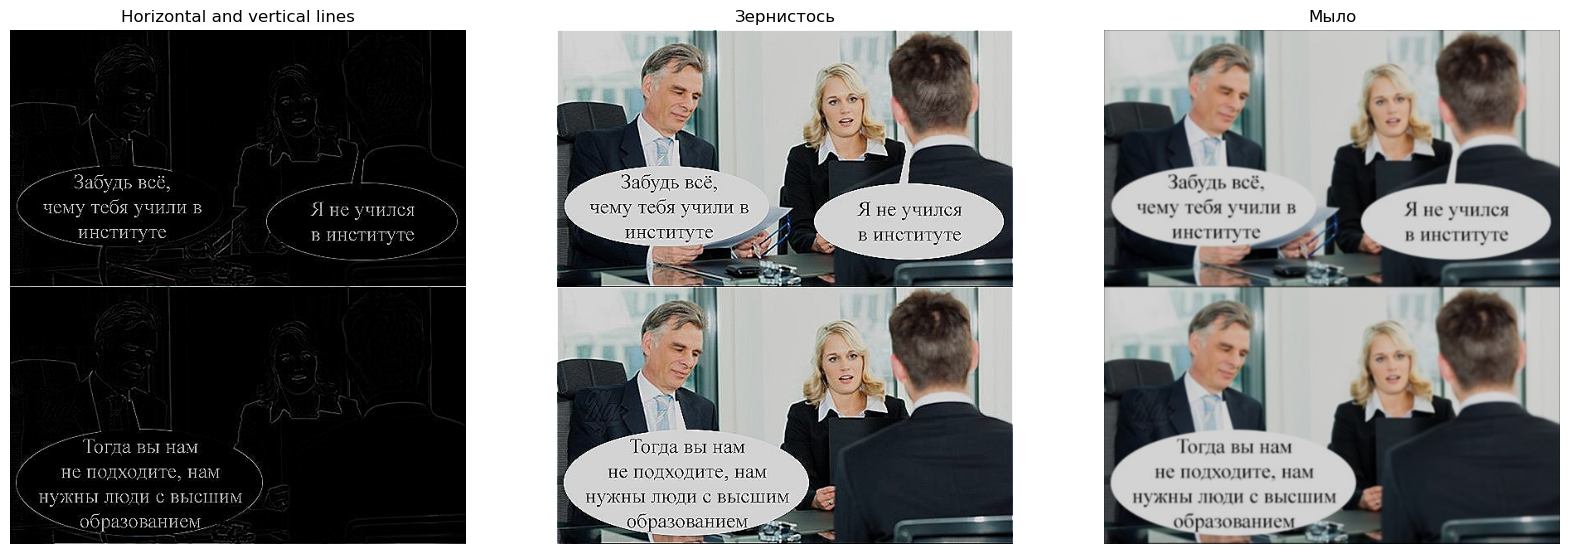

In [141]:
show_memes(img, kernels, labels)

# Теперь детектор Движения


In [4]:
from IPython.display import display, clear_output

In [7]:
import cv2

# Получите список доступных устройств для захвата видео
available_cameras = []
for i in range(10): 
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        available_cameras.append(i)
    cap.release()

if len(available_cameras) > 0:
    print("Доступные веб-камеры:")
    for i, camera_index in enumerate(available_cameras):
        print(f"Камера {i}: /dev/video{camera_index}")
else:
    print("Веб-камеры не найдены")


Доступные веб-камеры:
Камера 0: /dev/video0


In [44]:
def mark_movment(prev_frame, frame):
    prev_frame_g = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    frame_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    threshold = 60
    maxval = 250

    ret_val = cv2.absdiff(prev_frame_g, frame_g)
    _, ret_val = cv2.threshold(ret_val, threshold, maxval, cv2.THRESH_BINARY)
    
    return ret_val

In [47]:
import cv2
from IPython.display import display, Image

video = cv2.VideoCapture(0)
display_handle=display(None, display_id=True)

is_ok, prev_frame = video.read()
prev_frame = cv2.flip(prev_frame, 1)
if not is_ok:
    print('uuups')

try:
    while True:
        is_ok, frame = video.read()
        if not is_ok:
            break
        frame = cv2.flip(frame, 1)
        
        frame_movement = mark_movment(prev_frame, frame)

        prev_frame = frame

        _, frame_movement = cv2.imencode('.jpeg', frame_movement)# если не открылось то увыя
        display_handle.update(Image(data=frame_movement.tobytes()))



except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)

None